In [30]:
# Notebook: EDA + Predictive modeling

# Step 1 - Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Step 2 - Load dataset
df = pd.read_csv(r'C:\Users\dungb\OneDrive\Documents\bank-marketing-analytics-porfolio\data\bank-full.csv', sep=';') # Note: sep=';' for semicolon-separated values
print(df.head())
print(df.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

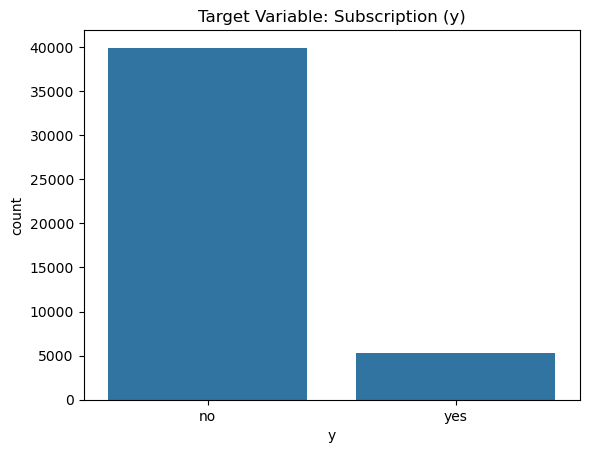

In [31]:
# step 3 - Target variable (EDA)
sns.countplot(x='y', data=df)
plt.title('Target Variable: Subscription (y)')
plt.show()

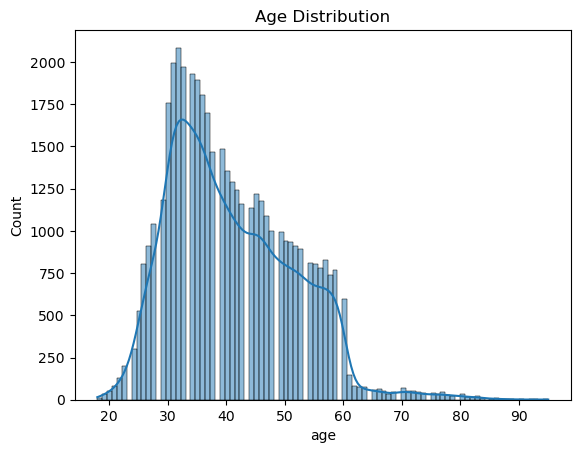

In [32]:
# Step 4 - EDA examples
# Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

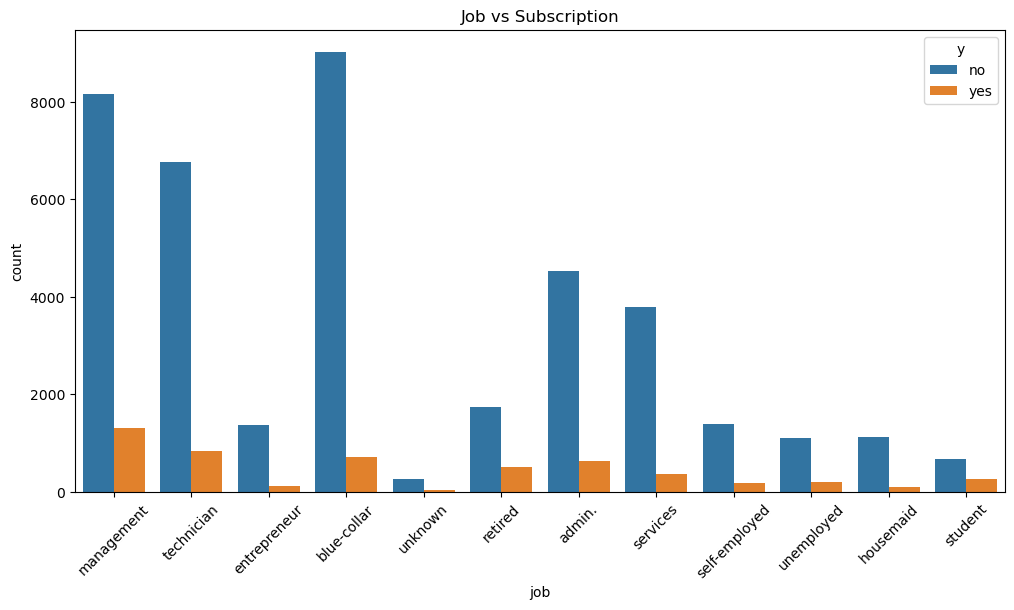

In [33]:
# Job vs target
plt.figure(figsize=(12, 6))
sns.countplot(x='job',hue='y', data=df)
plt.title('Job vs Subscription')
plt.xticks(rotation=45)
plt.show()


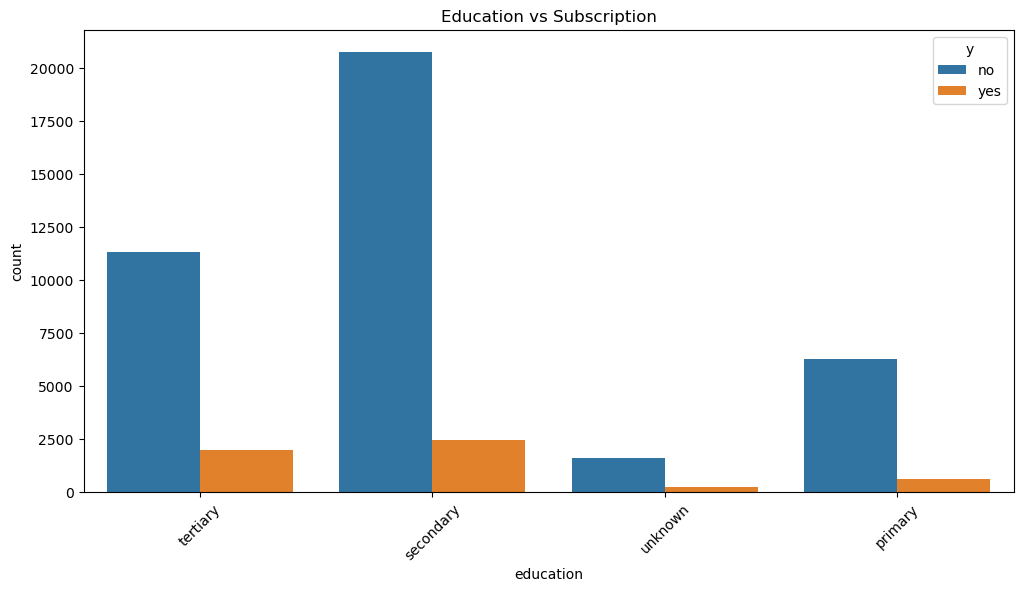

In [42]:
# Education vs target
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Education vs Subscription')
plt.xticks(rotation=45)
plt.show()

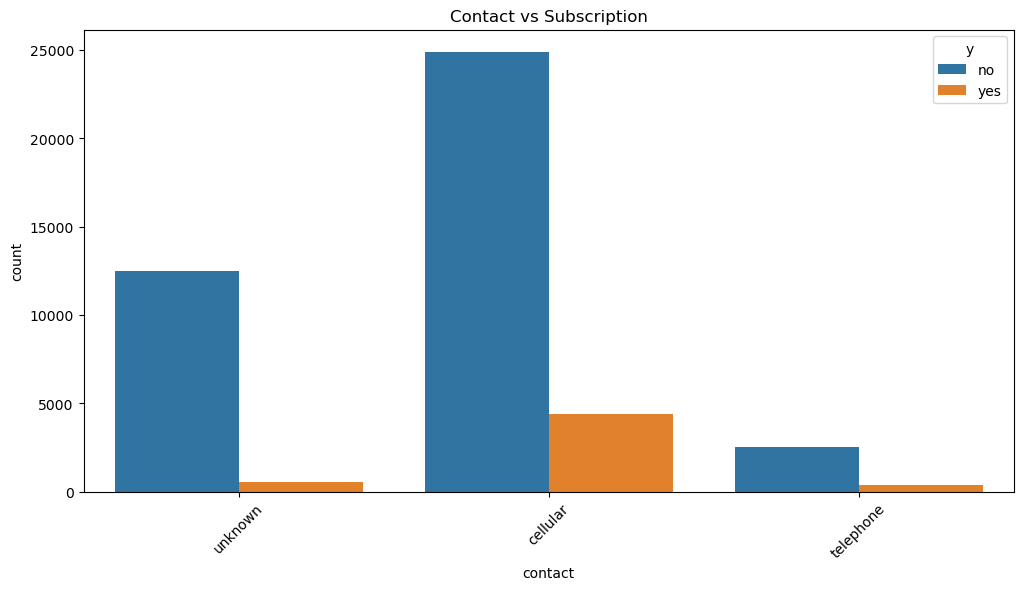

In [35]:
# Contact vs target
plt.figure(figsize=(12, 6))
sns.countplot(x='contact', hue='y', data=df)
plt.title('Contact vs Subscription')
plt.xticks(rotation=45)
plt.show()

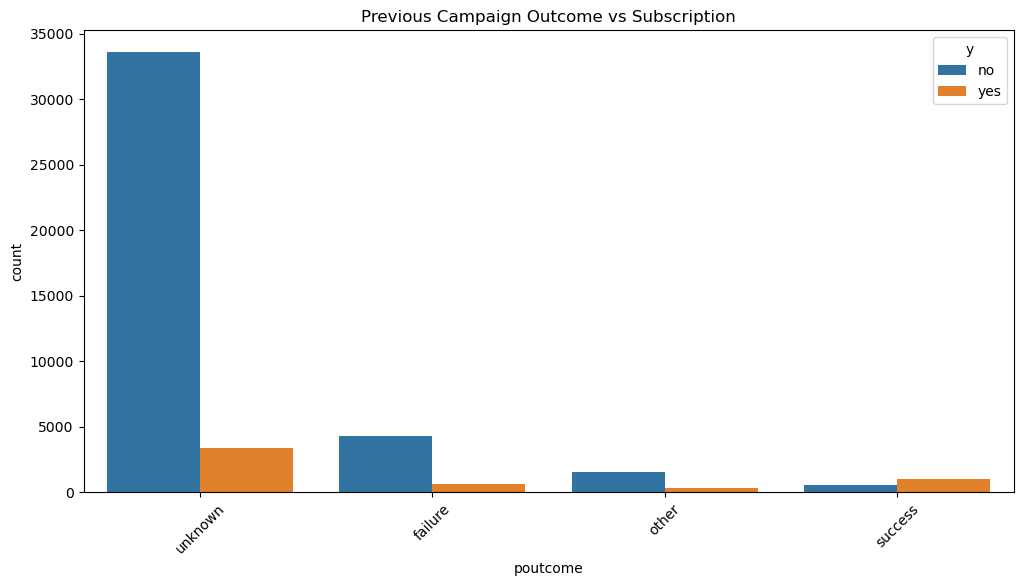

In [43]:
# Previous campaign outcome vs target
plt.figure(figsize=(12, 6))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Previous Campaign Outcome vs Subscription')
plt.xticks(rotation=45)
plt.show()

## EDA Summary
- The target variable is imbalanced: : ~88% of customers did **not** subscribe to the term deposit.
- Most customers fall between the ages of 25–50, with a long tail up to age 95.
- Jobs such as **students** and **retired** show relatively higher conversion rates.
- Higher education levels (especially **tertiary**) associate with better response rates.
- Contact method **cellular** has a much higher success rate than **unknown** or **telephone**.
- Customers with **successful previous campaign outcomes** have dramatically higher conversion rates (~65%).

In [44]:
# Step 5 - Data preprocessing
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define X and y
X = df_encoded.drop('y_yes', axis=1)  # Drop the target variable
y = df_encoded['y_yes']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6 - Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1]))


Logistic Regression Results:
[[11657   309]
 [ 1048   550]]
              precision    recall  f1-score   support

       False       0.92      0.97      0.94     11966
        True       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564

ROC AUC Score: 0.9064324827729462


Random Forest Results:
[[11655   311]
 [  967   631]]
              precision    recall  f1-score   support

       False       0.92      0.97      0.95     11966
        True       0.67      0.39      0.50      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564

ROC AUC Score: 0.927265419523025


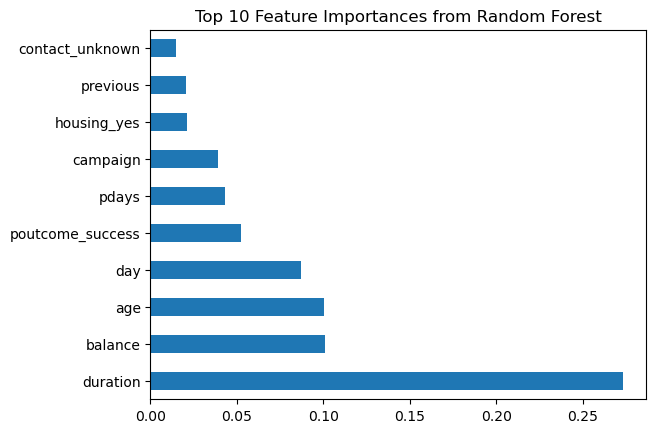

In [45]:
# Step 7 - Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1]))

# Step 8 - Feature Importance from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

## Modeling Approach
### Objective
The goal is to predict whether a customer will subscribe to a term deposit (`y = yes or no`) based on demographic, financial, and campaign-related features.

---

### Models Used
1. **Logistic Regression**:
- A simple, interpretable baseline classification model.
- Helps understand linear relationships between input variables and the likelihood of conversion.

2. **Random Forest Classifier**:
- An ensemble model that captures non-linear patterns and feature interactions
- More robust to outliers and noise compared to logistic regression.

---

### Evaluation Metrics
Both models were evaluated on the test set using the following:
- **Confusion Matrix**  
- **Precision, Recall, F1-score**  
- **ROC-AUC Score**

> **Note**: The dataset is imbalanced (~11.7% positive class), so accuracy is not a reliable metric. ROC-AUC and F1-score are better indicators.

---

### Results Summary
| Metric          | Logistic Regression | Random Forest |
|-----------------|---------------------|----------------|
| Precision (1)   | 0.64                | 0.67           |
| Recall (1)      | 0.34                | 0.40           |
| F1-score (1)    | 0.45                | 0.50           |
| ROC-AUC Score   | **0.91**            | **0.93**       |

### Feature Importance (Random Forest)
The top drivers of subscription were:
1. **Duration** of last call
2. **Balance** in the account
3. **Age**
4. **Previous campaign outcome (poutcome_success)**
5. **Day of month / Number of contacts during campaign**

>  Note: While `duration` is highly predictive, it is only known *after* the contact — so it cannot be used for campaign targeting but is useful for evaluating call performance.

###  Interpretation
- Customers with **positive history** from previous campaigns (`poutcome_success`) are significantly more likely to subscribe.
- Financial stability (as indicated by `balance`) and demographics like `age` also play a role.
- Contact method (`cellular`) and communication timing (e.g., earlier in the month) may influence decisions.